In [1]:
!pip install contextily
!pip install h3
!pip install keplergl
!jupyter labextension install @jupyter-widgets/jupyterlab-manager keplergl-jupyter
!pip install folium matplotlib mapclassify
!pip install geopandas
!pip install h3pandas

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.2/22.2 MB 35.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 993.5/993.5 kB 10.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.7/9.7 MB 59.7 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached jedi-0.19.2-py2.py3-none-any.whl.metadata (22 kB)
Using cached jedi-0.19.2-py2.py3-none-any.whl (1.6 MB)
  Created wheel for keplergl: filename=keplergl-0.3.2-py2.py3-none-any.whl size=17922316 sha256=71dbf9362164797b127fd7efa3b6cca68dbe2eec6df8b1f9d068aca84dba8788
  Stored in directory: /root/.cache/pip/wheels/e5/e9/db/b8b8f2fcb5cb1cd7268d88959fce267bc00697cb8f50dcd0d9
Successfully built keplergl
usage: jupyter [-h] [--version] [--config-dir] [--data-dir] [--runtime-dir] [--paths] [--json]
               [--debug]
               [subcommand]

Jupyter: Interactive Computing

positional arguments:
  subco

## Datos espaciales

Se trata de datos que contienen información sobre su ubicación. Esto nos añade una capa más de información, que en función del problema a estudiar, nos puede resultar muy util.

En nuestro caso, tenemos datos espaciales ya que disponemos de la latitud y longitud de los clientes. Esto puede ser algo menos intuitivo de visualizar, pero tenemos herramientas para hacerlo, como puede ser geopandas.

**Geopandas** es un proyecto de código abierto diseñadoo para tratar datos geoespaciales en python de forma facil. Geopandas extiende las capacidades de pandas permitiendo operaciones y objetos espaciales. Esto lo hace apoyandose en la libreria shapely.


In [2]:
# Datos espaciales
import geopandas as gpd
import contextily as cx
import matplotlib.pyplot as plt
import folium
import pandas as pd
from shapely.geometry import Point

data = pd.read_csv("material/data.csv")
data



order_id       fecha  order_customer_id         product_id  \
0     1016330781887  2023-05-29         6451824076  IAM925P00XXZPUDIA   
1     1095376438463  2023-07-16       664062345899  OTS925P00XXZPUDOT   
2     1047641588927  2023-06-17       642133246635  UND925P00XXZCOMUN   
3     1181322118257  2023-08-29       714672128644  OTS925A00XXZPUDOT   
4     1017492866239  2023-05-30       196440539724  IMO925P00XXZTOMIM   
...             ...         ...                ...                ...   
2995  1194025288817  2023-09-04       719590867588  IST925P00XXZPUSIS   
2996  1187671966833  2023-09-01       719629009540  UND925P00XXZCOMUN   
2997  1187874473073  2023-09-01       719731344004  OSE925R00XXZCOMOS   
2998  1187874473073  2023-09-01       719731344004  HDI925R00XXZPEAHD   
2999  1187874473073  2023-09-01       719731344004  REE925P00XXZTOFRE   

      unit_price  quantity   price product_family   latitude  longitude  
0          19.00         8  152.00        Pulsera  37.788617  -3.790215  
1          19.00         6  114.00        Pulsera  40.299542  -3.926774  
2          25.00         5  125.00         Collar  39.651927  -0.411277  
3          19.00         4   76.00        Pulsera  39.456511  -0.346203  
4          25.00         3   75.00      Tobillera  37.394171  -5.957857  
...          ...       ...     ...            ...        ...        ...  
2995       29.95         1   29.95        Pulsera  40.405862  -3.894836  
2996       25.00         1   25.00         Collar  40.549157  -3.653147  
2997       29.00         1   29.00         Collar  43.341313  -2.989285  
2998       21.75         1   21.75     Pendientes  43.341313  -2.989285  
2999       21.75         1   21.75      Tobillera  43.341313  -2.989285  

[3000 rows x 10 columns]

In [3]:
# Definimos que columnas tienen la información espacial
geometry = [Point(xy) for xy in zip(data['longitude'], data['latitude'])]

data_espacial = gpd.GeoDataFrame(data, geometry=geometry)

# Asignamos un CRS (coordinate reference system)
data_espacial.set_crs(epsg=4326, inplace=True)

data_espacial

order_id       fecha  order_customer_id         product_id  \
0     1016330781887  2023-05-29         6451824076  IAM925P00XXZPUDIA   
1     1095376438463  2023-07-16       664062345899  OTS925P00XXZPUDOT   
2     1047641588927  2023-06-17       642133246635  UND925P00XXZCOMUN   
3     1181322118257  2023-08-29       714672128644  OTS925A00XXZPUDOT   
4     1017492866239  2023-05-30       196440539724  IMO925P00XXZTOMIM   
...             ...         ...                ...                ...   
2995  1194025288817  2023-09-04       719590867588  IST925P00XXZPUSIS   
2996  1187671966833  2023-09-01       719629009540  UND925P00XXZCOMUN   
2997  1187874473073  2023-09-01       719731344004  OSE925R00XXZCOMOS   
2998  1187874473073  2023-09-01       719731344004  HDI925R00XXZPEAHD   
2999  1187874473073  2023-09-01       719731344004  REE925P00XXZTOFRE   

      unit_price  quantity   price product_family   latitude  longitude  \
0          19.00         8  152.00        Pulsera  37.788617  -3.790215   
1          19.00         6  114.00        Pulsera  40.299542  -3.926774   
2          25.00         5  125.00         Collar  39.651927  -0.411277   
3          19.00         4   76.00        Pulsera  39.456511  -0.346203   
4          25.00         3   75.00      Tobillera  37.394171  -5.957857   
...          ...       ...     ...            ...        ...        ...   
2995       29.95         1   29.95        Pulsera  40.405862  -3.894836   
2996       25.00         1   25.00         Collar  40.549157  -3.653147   
2997       29.00         1   29.00         Collar  43.341313  -2.989285   
2998       21.75         1   21.75     Pendientes  43.341313  -2.989285   
2999       21.75         1   21.75      Tobillera  43.341313  -2.989285   

                       geometry  
0     POINT (-3.79021 37.78862)  
1     POINT (-3.92677 40.29954)  
2     POINT (-0.41128 39.65193)  
3      POINT (-0.3462 39.45651)  
4     POINT (-5.95786 37.39417)  
...                         ...  
2995  POINT (-3.89484 40.40586)  
2996  POINT (-3.65315 40.54916)  
2997  POINT (-2.98928 43.34131)  
2998  POINT (-2.98928 43.34131)  
2999  POINT (-2.98928 43.34131)  

[3000 rows x 11 columns]

/usr/local/lib/python3.10/dist-packages/contextily/tile.py:645: UserWarning: The inferred zoom level of 23 is not valid for the current tile provider (valid zooms: 0 - 20).
  warnings.warn(msg)


<Axes: >

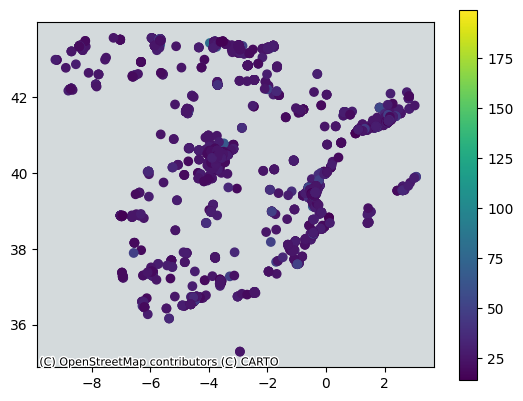

In [4]:
# Visualizacion espacial
# data_espacial = data_espacial.to_crs(epsg=3857)

ax = data_espacial.plot(column = "price", legend = True)
cx.add_basemap(ax, source=cx.providers.CartoDB.Positron) # añadimos una capa base

ax

In [5]:
# Visualizacion espacial interactiva
ax = data_espacial.explore(
    column = "unit_price",
    legend = True,
    tiles = "cartoDB dark_matter"
)
ax

In [ ]:

# Cuanto han gastado en los distintos puntos
sum_price_by_location = data_espacial.groupby(["geometry"], as_index = False)["price"].agg("sum")

# Volvemos a convertirlo en geodataframe
sum_price_by_location = gpd.GeoDataFrame(sum_price_by_location, geometry='geometry')  # sin esto dara error


ax = sum_price_by_location.explore(
    column = "price",
    legend = True,
    tiles = "cartoDB dark_matter"
)
ax

Hasta ahora hemos visto los datos de manera individual, pero esto no es útil para tener un conocimiento más generalizado. Si queremos sacar conclusiones o comparar unas poblaciones con otras, será necesario que podamos agrupar los distintos puntos y crear métricas agregadas.

Aqui nos podemos plantear varias opciones:

- agregar por territorios politicos (ciudades o provincias por ejemplo).
- agregar por mallas regulares (S2 o H3 por ejemplo).

A continuación, veremos como trabajar con H3, que se ha convertido en un estandard en el mundo de los datos geoespaciales.

H3 es un sistema de indexación geoespacial desarrollado por Uber que divide la superficie terrestre en una cuadrícula de celdas hexagonales jerárquicas. Este enfoque facilita el análisis y la visualización de datos espaciales.

Características principales de H3:

- División hexagonal: A diferencia de las cuadrículas tradicionales basadas en cuadrados, H3 utiliza hexágonos, lo que reduce errores de cuantización y permite una representación más precisa de áreas y distancias.

- Jerarquía de resoluciones: H3 ofrece múltiples niveles de resolución, desde celdas grandes que cubren extensas áreas hasta celdas más pequeñas para detalles más finos. Cada celda puede subdividirse en siete celdas hijas, manteniendo la estructura jerárquica.

- Cobertura global: El sistema cubre toda la superficie terrestre, permitiendo análisis consistentes en diferentes regiones y escalas.

In [6]:
import h3
from shapely.geometry import Polygon

def cell_to_shapely(cell):
    coords = h3.cell_to_boundary(cell)
    flipped = tuple(coord[::-1] for coord in coords)
    return Polygon(flipped)


# Obtenemos el hexagono al que pertenece cada punto en cierta resolucion
data_espacial['h3'] = data_espacial.apply(
    lambda row: h3.latlng_to_cell(row["latitude"], row["longitude"], 5), axis=1
)


# Obtenemos el contorno de los hexagonos H3
data_espacial['h3_boundary'] = data_espacial.apply(
    lambda row: cell_to_shapely(row["h3"]), axis=1
)

data_espacial



order_id       fecha  order_customer_id         product_id  \
0     1016330781887  2023-05-29         6451824076  IAM925P00XXZPUDIA   
1     1095376438463  2023-07-16       664062345899  OTS925P00XXZPUDOT   
2     1047641588927  2023-06-17       642133246635  UND925P00XXZCOMUN   
3     1181322118257  2023-08-29       714672128644  OTS925A00XXZPUDOT   
4     1017492866239  2023-05-30       196440539724  IMO925P00XXZTOMIM   
...             ...         ...                ...                ...   
2995  1194025288817  2023-09-04       719590867588  IST925P00XXZPUSIS   
2996  1187671966833  2023-09-01       719629009540  UND925P00XXZCOMUN   
2997  1187874473073  2023-09-01       719731344004  OSE925R00XXZCOMOS   
2998  1187874473073  2023-09-01       719731344004  HDI925R00XXZPEAHD   
2999  1187874473073  2023-09-01       719731344004  REE925P00XXZTOFRE   

      unit_price  quantity   price product_family   latitude  longitude  \
0          19.00         8  152.00        Pulsera  37.788617  -3.790215   
1          19.00         6  114.00        Pulsera  40.299542  -3.926774   
2          25.00         5  125.00         Collar  39.651927  -0.411277   
3          19.00         4   76.00        Pulsera  39.456511  -0.346203   
4          25.00         3   75.00      Tobillera  37.394171  -5.957857   
...          ...       ...     ...            ...        ...        ...   
2995       29.95         1   29.95        Pulsera  40.405862  -3.894836   
2996       25.00         1   25.00         Collar  40.549157  -3.653147   
2997       29.00         1   29.00         Collar  43.341313  -2.989285   
2998       21.75         1   21.75     Pendientes  43.341313  -2.989285   
2999       21.75         1   21.75      Tobillera  43.341313  -2.989285   

                       geometry               h3  \
0     POINT (-3.79021 37.78862)  85390a43fffffff   
1     POINT (-3.92677 40.29954)  85390c8ffffffff   
2     POINT (-0.41128 39.65193)  85395413fffffff   
3      POINT (-0.3462 39.45651)  8539540bfffffff   
4     POINT (-5.95786 37.39417)  85391c73fffffff   
...                         ...              ...   
2995  POINT (-3.89484 40.40586)  85390c87fffffff   
2996  POINT (-3.65315 40.54916)  85390cb7fffffff   
2997  POINT (-2.98928 43.34131)  85184b53fffffff   
2998  POINT (-2.98928 43.34131)  85184b53fffffff   
2999  POINT (-2.98928 43.34131)  85184b53fffffff   

                                            h3_boundary  
0     POLYGON ((-3.79864 37.89211, -3.88212 37.83114...  
1     POLYGON ((-4.03263 40.40578, -4.11895 40.34576...  
2     POLYGON ((-0.50265 39.76643, -0.58821 39.70964...  
3     POLYGON ((-0.44805 39.49643, -0.53329 39.43956...  
4     POLYGON ((-6.08283 37.49474, -6.16564 37.4314,...  
...                                                 ...  
2995  POLYGON ((-3.96966 40.55646, -4.05617 40.49658...  
2996  POLYGON ((-3.57693 40.61344, -3.66352 40.55398...  
2997  POLYGON ((-3.06825 43.48261, -3.15844 43.42533...  
2998  POLYGON ((-3.06825 43.48261, -3.15844 43.42533...  
2999  POLYGON ((-3.06825 43.48261, -3.15844 43.42533...  

[3000 rows x 13 columns]

In [ ]:
data_h3 = data_espacial.groupby("h3_boundary", as_index = False)["price"].agg("sum")
data_h3 = gpd.GeoDataFrame(data_h3, geometry="h3_boundary")
data_h3.set_crs(epsg=4326, inplace=True)

data_h3
ax = data_h3.explore(
    column = "price",
    legend = True,
    tiles = "cartoDB dark_matter"
)
ax

## Datos de area

No solo podemos tener puntos como datos espaciales. Podemos tener más tipos de datos, como pueden ser los poligonos. A continuación veremos un conjunto de datos que contiene la información de los distritos de Barcelona.

In [8]:
# Leemos y seleccionamos los datos de los distritos
terminos_municipales = gpd.read_file('material/distritos.json')
distritos = terminos_municipales[terminos_municipales["TIPUS_UA"] == 'DISTRICTE']
distritos.columns = [col.lower() for col in distritos.columns]
distritos = distritos[['nom','geometry']]
distritos

nom                                           geometry
1          Ciutat Vella  POLYGON ((431733.736 4582441.816, 431645.093 4...
2              Eixample  POLYGON ((432033.184 4583665.032, 432033.186 4...
3        Sants-Montjuïc  MULTIPOLYGON (((428773.911 4580873.742, 428692...
4             Les Corts  POLYGON ((425054.67 4583672.56, 425047.22 4583...
5   Sarrià-Sant Gervasi  MULTIPOLYGON (((422563.071 4587486.743, 422552...
6                Gràcia  POLYGON ((427826.987 4586145.356, 427820.696 4...
7        Horta-Guinardó  POLYGON ((429793.927 4589028.39, 429793.389 45...
8            Nou Barris  POLYGON ((432115.848 4590999.098, 432010.849 4...
9           Sant Andreu  POLYGON ((432158.516 4590377.238, 432142.038 4...
10           Sant Martí  POLYGON ((433770.023 4586475.362, 433726.353 4...

In [9]:
# Calcular area en km2
distritos["area"] = round(distritos.area / 1000000, 2)

# Calcular límites
distritos["boundary"] = distritos.boundary

# Calcular centro
distritos["centroid"] = distritos.centroid

# Crear un buffer de 500m de radio
distritos['buffer'] = distritos.centroid.buffer(500)

distritos

nom                                           geometry  \
1          Ciutat Vella  POLYGON ((431733.736 4582441.816, 431645.093 4...   
2              Eixample  POLYGON ((432033.184 4583665.032, 432033.186 4...   
3        Sants-Montjuïc  MULTIPOLYGON (((428773.911 4580873.742, 428692...   
4             Les Corts  POLYGON ((425054.67 4583672.56, 425047.22 4583...   
5   Sarrià-Sant Gervasi  MULTIPOLYGON (((422563.071 4587486.743, 422552...   
6                Gràcia  POLYGON ((427826.987 4586145.356, 427820.696 4...   
7        Horta-Guinardó  POLYGON ((429793.927 4589028.39, 429793.389 45...   
8            Nou Barris  POLYGON ((432115.848 4590999.098, 432010.849 4...   
9           Sant Andreu  POLYGON ((432158.516 4590377.238, 432142.038 4...   
10           Sant Martí  POLYGON ((433770.023 4586475.362, 433726.353 4...   

     area                                           boundary  \
1    4.20  LINESTRING (431733.736 4582441.816, 431645.093...   
2    7.46  LINESTRING (432033.184 4583665.032, 432033.186...   
3   22.88  MULTILINESTRING ((428773.911 4580873.742, 4286...   
4    6.01  LINESTRING (425054.67 4583672.56, 425047.22 45...   
5   19.92  MULTILINESTRING ((422563.071 4587486.743, 4225...   
6    4.22  LINESTRING (427826.987 4586145.356, 427820.696...   
7   11.92  LINESTRING (429793.927 4589028.39, 429793.389 ...   
8    8.06  LINESTRING (432115.848 4590999.098, 432010.849...   
9    6.59  LINESTRING (432158.516 4590377.238, 432142.038...   
10  10.44  LINESTRING (433770.023 4586475.362, 433726.353...   

                          centroid  \
1   POINT (431496.113 4581391.532)   
2   POINT (430147.676 4582565.842)   
3    POINT (428427.54 4577941.595)   
4   POINT (426277.316 4582086.881)   
5   POINT (425326.958 4584946.213)   
6    POINT (429144.45 4584648.339)   
7   POINT (429026.896 4586747.884)   
8   POINT (431092.259 4588631.676)   
9   POINT (432603.741 4587365.753)   
10  POINT (433221.374 4584317.786)   

                                               buffer  
1   POLYGON ((431996.113 4581391.532, 431993.705 4...  
2   POLYGON ((430647.676 4582565.842, 430645.268 4...  
3   POLYGON ((428927.54 4577941.595, 428925.132 45...  
4   POLYGON ((426777.316 4582086.881, 426774.908 4...  
5   POLYGON ((425826.958 4584946.213, 425824.55 45...  
6   POLYGON ((429644.45 4584648.339, 429642.043 45...  
7   POLYGON ((429526.896 4586747.884, 429524.489 4...  
8   POLYGON ((431592.259 4588631.676, 431589.851 4...  
9   POLYGON ((433103.741 4587365.753, 433101.334 4...  
10  POLYGON ((433721.374 4584317.786, 433718.966 4...

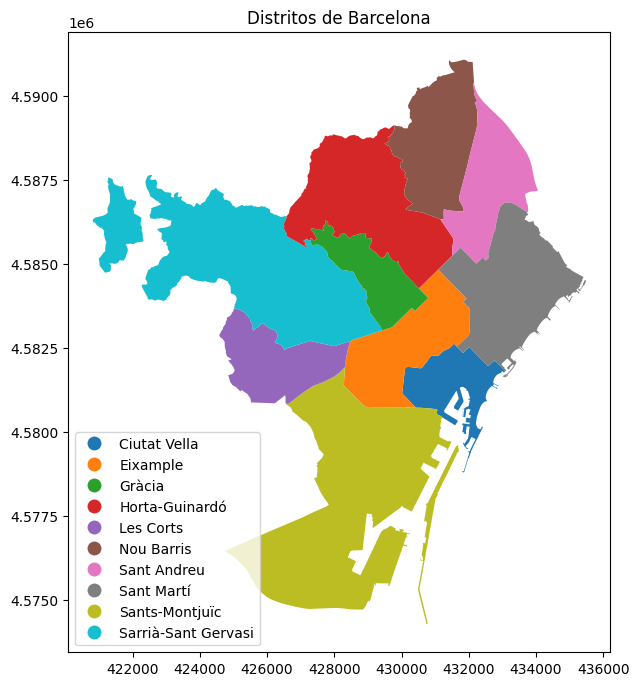

In [10]:

# Visualizamos los distritos
distritos.plot(column='nom',figsize=(7,9),legend=True,legend_kwds={'loc': 'lower left'})
plt.title('Distritos de Barcelona')
plt.show()

In [ ]:
# Visualizamos los distritos

ax = distritos.explore(
    column = "area",
    legend = True,
    tiles = "cartoDB dark_matter"
)
ax

In [ ]:
# Visualizamos los clientes junto con los distritos de Barcelona
ax = distritos.explore(
    column = "area",
    legend = True,
    name = "Distritos",
    tiles = "cartoDB dark_matter"
)

ax = sum_price_by_location.explore(
    m = ax,
    column = "price",
    legend = True,
    name = "Clientes",
    tiles = "cartoDB dark_matter"
)

folium.LayerControl().add_to(ax)

ax

In [ ]:
# Filtrar informacion solo de Barcelona

# Unificamos crs para poder hacer operaciones consistentes
sum_price_by_location = sum_price_by_location.to_crs(epsg=3857)
distritos = distritos.to_crs(epsg=3857)

clientes_de_barcelona = gpd.sjoin(sum_price_by_location, distritos, how="inner")
clientes_de_barcelona



geometry   price  index_right                  nom  \
888  POINT (240226.103 5067555.862)   50.00            3       Sants-Montjuïc   
889  POINT (237580.206 5066664.495)   69.00            3       Sants-Montjuïc   
894   POINT (237536.09 5069911.792)   94.00            4            Les Corts   
895   POINT (237895.73 5069048.427)   84.90            4            Les Corts   
896  POINT (240512.895 5068704.699)   29.00            2             Eixample   
897   POINT (240547.549 5069591.55)   63.00            2             Eixample   
898  POINT (238836.713 5068931.025)  210.50            2             Eixample   
899  POINT (238832.494 5070254.035)   63.00            2             Eixample   
900  POINT (239280.822 5070970.818)   45.00            5  Sarrià-Sant Gervasi   
901  POINT (240546.247 5070093.425)   39.00            2             Eixample   
902  POINT (240569.769 5070439.948)   35.00            2             Eixample   
903  POINT (240867.259 5071134.173)   25.00            2             Eixample   
904  POINT (240425.955 5072138.628)  197.75            6               Gràcia   
905  POINT (239331.272 5072004.003)   38.00            6               Gràcia   
906  POINT (238926.971 5072140.023)  187.00            5  Sarrià-Sant Gervasi   
907  POINT (238163.208 5070902.067)  233.35            5  Sarrià-Sant Gervasi   
908  POINT (237835.383 5070119.822)  108.00            4            Les Corts   
909  POINT (237117.673 5072766.378)   25.00            5  Sarrià-Sant Gervasi   
910  POINT (240224.823 5076245.109)   75.00            7       Horta-Guinardó   
911  POINT (238329.352 5073495.193)   19.00            6               Gràcia   
912  POINT (240510.535 5072802.786)   35.00            6               Gràcia   
913  POINT (242019.638 5074105.367)   29.00            7       Horta-Guinardó   
914    POINT (241305.813 5075876.3)   50.00            8           Nou Barris   
915   POINT (244728.264 5073202.93)   25.00           10           Sant Martí   
916  POINT (243239.555 5072399.067)   41.00           10           Sant Martí   
917  POINT (242113.302 5070903.729)   29.00            2             Eixample   
918  POINT (241403.886 5069651.716)   90.00            2             Eixample   
919   POINT (246914.746 5072657.05)   62.50           10           Sant Martí   

      area                                           boundary  \
888  22.88  MULTILINESTRING ((428773.911 4580873.742, 4286...   
889  22.88  MULTILINESTRING ((428773.911 4580873.742, 4286...   
894   6.01  LINESTRING (425054.67 4583672.56, 425047.22 45...   
895   6.01  LINESTRING (425054.67 4583672.56, 425047.22 45...   
896   7.46  LINESTRING (432033.184 4583665.032, 432033.186...   
897   7.46  LINESTRING (432033.184 4583665.032, 432033.186...   
898   7.46  LINESTRING (432033.184 4583665.032, 432033.186...   
899   7.46  LINESTRING (432033.184 4583665.032, 432033.186...   
900  19.92  MULTILINESTRING ((422563.071 4587486.743, 4225...   
901   7.46  LINESTRING (432033.184 4583665.032, 432033.186...   
902   7.46  LINESTRING (432033.184 4583665.032, 432033.186...   
903   7.46  LINESTRING (432033.184 4583665.032, 432033.186...   
904   4.22  LINESTRING (427826.987 4586145.356, 427820.696...   
905   4.22  LINESTRING (427826.987 4586145.356, 427820.696...   
906  19.92  MULTILINESTRING ((422563.071 4587486.743, 4225...   
907  19.92  MULTILINESTRING ((422563.071 4587486.743, 4225...   
908   6.01  LINESTRING (425054.67 4583672.56, 425047.22 45...   
909  19.92  MULTILINESTRING ((422563.071 4587486.743, 4225...   
910  11.92  LINESTRING (429793.927 4589028.39, 429793.389 ...   
911   4.22  LINESTRING (427826.987 4586145.356, 427820.696...   
912   4.22  LINESTRING (427826.987 4586145.356, 427820.696...   
913  11.92  LINESTRING (429793.927 4589028.39, 429793.389 ...   
914   8.06  LINESTRING (432115.848 4590999.098, 432010.849...   
915  10.44  LINESTRING (433770.023 4586475.362, 433726.353...   
916  10.44  LINESTRING (433770.023 4586475.362, 4337

In [ ]:
ax = distritos.explore(column = "area", legend = True, name = "Distritos",tiles = "cartoDB dark_matter")
ax = clientes_de_barcelona.explore(m = ax, column = "price", legend = True, name = "Clientes", tiles = "cartoDB dark_matter")
folium.LayerControl().add_to(ax)
ax

In [12]:
from google.colab import output
output.enable_custom_widget_manager()

In [14]:
from keplergl import KeplerGl
# from google.colab import output
# output.enable_custom_widget_manager()

map=KeplerGl(height=800, data={"clientes":data},show_docs=False)
map

KeplerGl(data={'clientes':            order_id       fecha  order_customer_id         product_id  \
0     1016…

In [ ]:
data_espacial[['order_id', 'fecha', 'order_customer_id', 'product_id', 'unit_price',
       'quantity', 'price', 'product_family', 'latitude', 'longitude', 'h3']].to_csv("espacial.csv")